In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
dataset = pd.read_csv('../Datasets/Dataset.csv')

# 1.) Exploratory Data Analysis

In [3]:
dataset.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [4]:
dataset.drop(['encounter_id', 'patient_id','hospital_id'], axis=1, inplace=True)

In [5]:
dataset.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [6]:
dataset.shape

(91713, 183)

In [7]:
dataset.isnull().sum().sort_values(ascending=False).head(80)

h1_bilirubin_min         84619
h1_bilirubin_max         84619
h1_lactate_min           84369
h1_lactate_max           84369
h1_albumin_max           83824
                         ...  
h1_temp_min              21732
h1_temp_max              21732
hospital_admit_source    21409
hematocrit_apache        19878
bun_apache               19262
Length: 80, dtype: int64

In [8]:
features_to_drop = dataset.isnull().sum().sort_values(ascending=False).head(80).index
dataset.drop(features_to_drop, axis=1, inplace=True)
dataset.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


## Separating Continuous and Categorical features

In [9]:
cont_features = list()
cat_features = list()

In [10]:
def getNUniquesount(feature):
  nUnique = dataset[feature].nunique()
  if nUnique > 15 :
    cont_features.append(feature)
  else:
    cat_features.append(feature)
  print('{} : {}'.format(feature, nUnique))

In [11]:
def getValueCount(dataset, feature):
  print('{} : {}'.format(feature, dataset[feature].value_counts()))
  print()

In [12]:
for feature in dataset.columns:
  getNUniquesount(feature)

hospital_death : 2
age : 74
bmi : 34888
elective_surgery : 2
ethnicity : 6
gender : 2
height : 401
icu_admit_source : 5
icu_id : 241
icu_stay_type : 3
icu_type : 8
pre_icu_los_days : 9757
readmission_status : 1
weight : 3409
apache_2_diagnosis : 44
apache_3j_diagnosis : 399
apache_post_operative : 2
arf_apache : 2
creatinine_apache : 1127
gcs_eyes_apache : 4
gcs_motor_apache : 6
gcs_unable_apache : 2
gcs_verbal_apache : 5
glucose_apache : 565
heart_rate_apache : 149
intubated_apache : 2
map_apache : 161
resprate_apache : 74
sodium_apache : 119
temp_apache : 191
ventilated_apache : 2
d1_diasbp_max : 120
d1_diasbp_min : 78
d1_diasbp_noninvasive_max : 120
d1_diasbp_noninvasive_min : 78
d1_heartrate_max : 120
d1_heartrate_min : 154
d1_mbp_max : 125
d1_mbp_min : 91
d1_mbp_noninvasive_max : 122
d1_mbp_noninvasive_min : 91
d1_resprate_max : 79
d1_resprate_min : 55
d1_spo2_max : 43
d1_spo2_min : 101
d1_sysbp_max : 143
d1_sysbp_min : 120
d1_sysbp_noninvasive_max : 143
d1_sysbp_noninvasive_min :

In [13]:
print(len(cont_features))
print(cont_features)

77
['age', 'bmi', 'height', 'icu_id', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'creatinine_apache', 'glucose_apache', 'heart_rate_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_mi

In [14]:
print(len(cat_features))
print(cat_features)

26
['hospital_death', 'elective_surgery', 'ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'readmission_status', 'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'apache_3j_bodysystem', 'apache_2_bodysystem']


In [15]:
dataset_cont = dataset[cont_features]
dataset_cat = dataset[cat_features]

## Working on Continuous Features

In [16]:
dataset_cont.head()

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,creatinine_apache,glucose_apache,...,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,68.0,22.73,180.3,92,0.541667,73.9,113.0,502.01,2.51,168.0,...,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05
1,77.0,27.42,160.0,90,0.927778,70.2,108.0,203.01,0.56,145.0,...,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29
2,25.0,31.95,172.7,93,0.000694,95.3,122.0,703.03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
3,81.0,22.64,165.1,92,0.000694,61.7,203.0,1206.03,NaN,185.0,...,198.0,43.0,5.0,3.5,NaN,NaN,9.0,8.0,0.04,0.03
4,19.0,NaN,188.0,91,0.073611,NaN,119.0,601.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dataset_cont.shape

(91713, 77)

In [18]:
missing_df_cont = pd.DataFrame(dataset_cont.isnull().sum(), columns=['Count'])
missing_df_cont['Percentage'] = (missing_df_cont['Count']/dataset_cont.shape[0]) * 100
missing_df_cont.sort_values(by=['Count'], ascending=False).head(60)

,Count,Percentage
creatinine_apache,18853,20.556519
sodium_apache,18600,20.280658
d1_hco3_max,15071,16.432785
d1_hco3_min,15071,16.432785
d1_platelets_max,13444,14.658772
d1_platelets_min,13444,14.658772
d1_wbc_min,13174,14.364376
d1_wbc_max,13174,14.364376
d1_calcium_min,13069,14.249888
d1_calcium_max,13069,14.249888


### Missing values less than 5%

In [19]:
features_with_5 = missing_df_cont[(missing_df_cont['Percentage'] > 0) & (missing_df_cont['Percentage']<=5)].sort_values(by = ['Count'], ascending=False).index
print(len(features_with_5))
print(features_with_5)

40
Index(['h1_resprate_min', 'h1_resprate_max', 'age', 'h1_spo2_min',
       'h1_spo2_max', 'temp_apache', 'h1_diasbp_min', 'h1_diasbp_max',
       'h1_sysbp_max', 'h1_sysbp_min', 'bmi', 'h1_heartrate_min',
       'h1_heartrate_max', 'weight', 'd1_temp_min', 'd1_temp_max',
       'apache_2_diagnosis', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'height', 'resprate_apache',
       'apache_3j_diagnosis', 'd1_diasbp_noninvasive_min',
       'd1_diasbp_noninvasive_max', 'd1_sysbp_noninvasive_max',
       'd1_sysbp_noninvasive_min', 'map_apache', 'heart_rate_apache',
       'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_min', 'd1_spo2_max',
       'd1_mbp_min', 'd1_mbp_max', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_sysbp_max', 'd1_sysbp_min', 'd1_heartrate_min', 'd1_heartrate_max'],
      dtype='object')


In [20]:
def evaluateCAA(feature):
  fig = plt.figure()
  ax =fig.add_subplot(111)

  # original data
  dataset_cont[feature].plot.density(color='red')
  #dataset_cont[feature].hist(bins=50, ax=ax, density=True, color='red')

  # caa data
  dataset_cont[feature].dropna().plot.density(color='green')
  #dataset_cont[feature].dropna().hist(bins=50, ax=ax, density=True, color='blue')


  plt.title('For {}'.format(feature))

In [21]:
# for feature in features_with_5:
#   evaluateCAA(feature)

#### For the features with less than 5% missing values, the distribution did not change. So we can drop the rows.

### Missing values greater than 5%

In [22]:
features_with_above_5 = missing_df_cont[missing_df_cont['Percentage'] > 5].sort_values(by = ['Count'], ascending=False).index
print(len(features_with_above_5))
print(features_with_above_5)

35
Index(['creatinine_apache', 'sodium_apache', 'd1_hco3_min', 'd1_hco3_max',
       'd1_platelets_min', 'd1_platelets_max', 'd1_wbc_max', 'd1_wbc_min',
       'd1_calcium_max', 'd1_calcium_min', 'd1_hemaglobin_min',
       'd1_hemaglobin_max', 'd1_hematocrit_min', 'd1_hematocrit_max',
       'glucose_apache', 'd1_bun_max', 'd1_bun_min', 'd1_sodium_min',
       'd1_sodium_max', 'd1_creatinine_max', 'd1_creatinine_min',
       'd1_potassium_max', 'd1_potassium_min', 'h1_mbp_noninvasive_max',
       'h1_mbp_noninvasive_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'h1_diasbp_noninvasive_min',
       'h1_diasbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
       'h1_sysbp_noninvasive_max', 'd1_glucose_min', 'd1_glucose_max',
       'h1_mbp_min', 'h1_mbp_max'],
      dtype='object')


In [23]:
# for feature in features_with_above_5:
#   evaluateCAA(feature)

#### For the features with greater than 5% missing values, the distribution did not change. So we can drop the rows.

In [24]:
dataset_cont.shape

(91713, 77)

## Working with Categorical Features

In [25]:
dataset_cat.head()

,hospital_death,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,readmission_status,apache_post_operative,arf_apache,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,0,Caucasian,M,Floor,admit,CTICU,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,0,Caucasian,F,Floor,admit,Med-Surg ICU,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,0,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,1,Caucasian,F,Operating Room / Recovery,admit,CTICU,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,0,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [26]:
dataset_cat.isnull().sum()

hospital_death                    0
elective_surgery                  0
ethnicity                      1395
gender                           25
icu_admit_source                112
icu_stay_type                     0
icu_type                          0
readmission_status                0
apache_post_operative             0
arf_apache                      715
gcs_eyes_apache                1901
gcs_motor_apache               1901
gcs_unable_apache              1037
gcs_verbal_apache              1901
intubated_apache                715
ventilated_apache               715
aids                            715
cirrhosis                       715
diabetes_mellitus               715
hepatic_failure                 715
immunosuppression               715
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
dtype: int64

In [27]:
dataset_cat['ethnicity'].dropna().isnull().sum()

0

In [28]:
dataset_cat.dropna().shape[0]/ dataset_cat.shape[0]

0.9550227339635602

#### This implies that even if we drop the null values from categorical data, it still has 95% of data.

# 2.) Data Preprocessing

In [29]:
intermediate_df = pd.concat([dataset_cont, dataset_cat], axis=1)
intermediate_df.shape

(91713, 103)

In [30]:
intermediate_df.dropna(inplace=True)

In [31]:
intermediate_df.shape

(42879, 103)

In [32]:
intermediate_df.head()

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,creatinine_apache,glucose_apache,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,68.0,22.730000,180.3,92,0.541667,73.9,113.0,502.01,2.51,168.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,77.0,27.420000,160.0,90,0.927778,70.2,108.0,203.01,0.56,145.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
5,67.0,27.560000,190.5,95,0.000694,100.0,301.0,403.01,0.71,156.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
17,46.0,25.845717,167.6,92,0.000000,72.6,108.0,203.01,1.00,143.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
23,87.0,21.963763,180.3,97,5.046528,71.4,113.0,501.05,0.94,105.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular


In [33]:
y = intermediate_df['hospital_death']

preprocessed_dataset_cat = intermediate_df[cat_features].drop('hospital_death', axis=1)
preprocessed_dataset_cont = intermediate_df.drop(cat_features, axis=1)

In [34]:
preprocessed_dataset_cont.head()

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,creatinine_apache,glucose_apache,...,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,68.0,22.730000,180.3,92,0.541667,73.9,113.0,502.01,2.51,168.0,...,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05
1,77.0,27.420000,160.0,90,0.927778,70.2,108.0,203.01,0.56,145.0,...,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29
5,67.0,27.560000,190.5,95,0.000694,100.0,301.0,403.01,0.71,156.0,...,159.0,159.0,3.9,3.7,137.0,137.0,10.9,10.9,0.05,0.02
17,46.0,25.845717,167.6,92,0.000000,72.6,108.0,203.01,1.00,143.0,...,247.0,247.0,4.9,4.9,132.0,132.0,9.7,9.7,0.11,0.06
23,87.0,21.963763,180.3,97,5.046528,71.4,113.0,501.05,0.94,105.0,...,273.0,273.0,3.4,3.3,146.0,146.0,9.9,9.9,0.31,0.14


In [35]:
preprocessed_dataset_cat.head()

,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,readmission_status,apache_post_operative,arf_apache,gcs_eyes_apache,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,Caucasian,M,Floor,admit,CTICU,0,0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,Caucasian,F,Floor,admit,Med-Surg ICU,0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
5,0,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,0,0,0.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
17,0,Hispanic,M,Accident & Emergency,admit,CTICU,0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
23,0,Caucasian,M,Floor,admit,MICU,0,0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular


In [36]:
preprocessed_dataset_cont.shape, preprocessed_dataset_cat.shape, y.shape

((42879, 77), (42879, 25), (42879,))

In [37]:
for feature in preprocessed_dataset_cat.columns:
  getNUniquesount(feature)

elective_surgery : 2
ethnicity : 6
gender : 2
icu_admit_source : 5
icu_stay_type : 3
icu_type : 8
readmission_status : 1
apache_post_operative : 2
arf_apache : 2
gcs_eyes_apache : 4
gcs_motor_apache : 6
gcs_unable_apache : 2
gcs_verbal_apache : 5
intubated_apache : 2
ventilated_apache : 2
aids : 2
cirrhosis : 2
diabetes_mellitus : 2
hepatic_failure : 2
immunosuppression : 2
leukemia : 2
lymphoma : 2
solid_tumor_with_metastasis : 2
apache_3j_bodysystem : 11
apache_2_bodysystem : 10


## Data Cleaning

### ethnicity 

In [38]:
preprocessed_dataset_cat['ethnicity'].value_counts()

Caucasian           33851
African American     4355
Hispanic             2088
Other/Unknown        1716
Native American       436
Asian                 433
Name: ethnicity, dtype: int64

In [39]:
def cleanEthinicity(value):
  if value in ['African American', 'Hispanic', 'Native American']:
    return 'American'
  else:
    return value

In [40]:
def valueCounts(feature):
  print(preprocessed_dataset_cat[feature].value_counts())

In [41]:
preprocessed_dataset_cat['ethnicity'] = preprocessed_dataset_cat['ethnicity'].apply(cleanEthinicity)
valueCounts('ethnicity')

Caucasian        33851
American          6879
Other/Unknown     1716
Asian              433
Name: ethnicity, dtype: int64


In [42]:
features_to_drop = ['aids',
'readmission_status',
'arf_apache',
'gcs_unable_apache',
'cirrhosis',
'hepatic_failure',
'immunosuppression',
'leukemia',
'lymphoma',
'solid_tumor_with_metastasis']

In [43]:
preprocessed_dataset_cat.drop(features_to_drop, axis=1, inplace=True)
preprocessed_dataset_cat.head()

,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,diabetes_mellitus,apache_3j_bodysystem,apache_2_bodysystem
0,0,Caucasian,M,Floor,admit,CTICU,0,3.0,6.0,4.0,0.0,0.0,1.0,Sepsis,Cardiovascular
1,0,Caucasian,F,Floor,admit,Med-Surg ICU,0,1.0,3.0,1.0,0.0,1.0,1.0,Respiratory,Respiratory
5,0,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,0,4.0,6.0,5.0,0.0,0.0,1.0,Neurological,Neurologic
17,0,American,M,Accident & Emergency,admit,CTICU,0,1.0,4.0,1.0,1.0,1.0,0.0,Respiratory,Respiratory
23,0,Caucasian,M,Floor,admit,MICU,0,3.0,6.0,1.0,0.0,1.0,0.0,Sepsis,Cardiovascular


In [44]:
# for feature in preprocessed_dataset_cat.columns:
#   getValueCount(preprocessed_dataset_cat, feature)

In [45]:
preprocessed_dataset_cont.shape, preprocessed_dataset_cat.shape, y.shape

((42879, 77), (42879, 15), (42879,))

In [46]:
preprocessed_dataset_cat.head()

,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,diabetes_mellitus,apache_3j_bodysystem,apache_2_bodysystem
0,0,Caucasian,M,Floor,admit,CTICU,0,3.0,6.0,4.0,0.0,0.0,1.0,Sepsis,Cardiovascular
1,0,Caucasian,F,Floor,admit,Med-Surg ICU,0,1.0,3.0,1.0,0.0,1.0,1.0,Respiratory,Respiratory
5,0,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,0,4.0,6.0,5.0,0.0,0.0,1.0,Neurological,Neurologic
17,0,American,M,Accident & Emergency,admit,CTICU,0,1.0,4.0,1.0,1.0,1.0,0.0,Respiratory,Respiratory
23,0,Caucasian,M,Floor,admit,MICU,0,3.0,6.0,1.0,0.0,1.0,0.0,Sepsis,Cardiovascular


In [47]:
preprocessed_dataset_cont.head()

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,creatinine_apache,glucose_apache,...,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,68.0,22.730000,180.3,92,0.541667,73.9,113.0,502.01,2.51,168.0,...,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05
1,77.0,27.420000,160.0,90,0.927778,70.2,108.0,203.01,0.56,145.0,...,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29
5,67.0,27.560000,190.5,95,0.000694,100.0,301.0,403.01,0.71,156.0,...,159.0,159.0,3.9,3.7,137.0,137.0,10.9,10.9,0.05,0.02
17,46.0,25.845717,167.6,92,0.000000,72.6,108.0,203.01,1.00,143.0,...,247.0,247.0,4.9,4.9,132.0,132.0,9.7,9.7,0.11,0.06
23,87.0,21.963763,180.3,97,5.046528,71.4,113.0,501.05,0.94,105.0,...,273.0,273.0,3.4,3.3,146.0,146.0,9.9,9.9,0.31,0.14


In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()

In [50]:
new_cat = pd.DataFrame(le.fit_transform(preprocessed_dataset_cat['elective_surgery']), columns=['elective_surgery'], index=preprocessed_dataset_cat.index)

In [51]:
new_cat.head()

,elective_surgery
0,0
1,0
5,0
17,0
23,0


In [52]:
preprocessed_dataset_cat.columns

Index(['elective_surgery', 'ethnicity', 'gender', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_post_operative', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_verbal_apache', 'intubated_apache',
       'ventilated_apache', 'diabetes_mellitus', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [53]:
for col in preprocessed_dataset_cat.columns[1:]:
  le = LabelEncoder()
  new_cat[col] = le.fit_transform(preprocessed_dataset_cat[col])

In [54]:
new_cat.head()

,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,diabetes_mellitus,apache_3j_bodysystem,apache_2_bodysystem
0,0,2,1,1,0,2,0,2,5,3,0,0,1,9,0
1,0,2,0,1,0,5,0,0,2,0,0,1,1,8,6
5,0,2,1,0,0,5,0,3,5,4,0,0,1,7,4
17,0,0,1,0,0,2,0,0,3,0,1,1,0,8,6
23,0,2,1,1,0,4,0,2,5,0,0,1,0,9,0


In [55]:
# final_cat_df = pd.get_dummies(preprocessed_dataset_cat['elective_surgery'], prefix = 'elective_surgery', drop_first=True)
# final_cat_df.head()

#Remove

In [56]:
def dummies(feature):
  dummies = pd.get_dummies(preprocessed_dataset_cat[feature], prefix= feature, drop_first=True)
  return dummies

In [57]:
# for feature in preprocessed_dataset_cat.columns[1:]:
#   dummies_df = dummies(feature)
#   final_cat_df = pd.concat([final_cat_df, dummies_df], axis=1)

#Remove

In [58]:
# final_cat_df.head()

# Remove

In [59]:
preprocessed_dataset_cont.shape, new_cat.shape, y.shape

((42879, 77), (42879, 15), (42879,))

In [60]:
# preprocessed_dataset_cont.shape, final_cat_df.shape, y.shape
# Remove

In [61]:
final_df = pd.concat([preprocessed_dataset_cont, new_cat], axis=1)
final_df

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,creatinine_apache,glucose_apache,...,icu_type,apache_post_operative,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,diabetes_mellitus,apache_3j_bodysystem,apache_2_bodysystem
0,68.0,22.730000,180.3,92,0.541667,73.9,113.0,502.01,2.51,168.0,...,2,0,2,5,3,0,0,1,9,0
1,77.0,27.420000,160.0,90,0.927778,70.2,108.0,203.01,0.56,145.0,...,5,0,0,2,0,0,1,1,8,6
5,67.0,27.560000,190.5,95,0.000694,100.0,301.0,403.01,0.71,156.0,...,5,0,3,5,4,0,0,1,7,4
17,46.0,25.845717,167.6,92,0.000000,72.6,108.0,203.01,1.00,143.0,...,2,0,0,3,0,1,1,0,8,6
23,87.0,21.963763,180.3,97,5.046528,71.4,113.0,501.05,0.94,105.0,...,4,0,2,5,0,0,1,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91692,36.0,20.575852,162.6,921,0.011111,54.4,123.0,702.01,0.40,58.0,...,5,0,3,5,4,0,0,1,5,3
91698,47.0,51.439842,195.0,908,0.033333,186.0,304.0,1406.01,0.50,128.0,...,5,1,3,5,1,0,0,0,1,1
91706,54.0,19.770448,177.8,925,0.025694,62.5,109.0,108.01,0.70,91.0,...,5,0,3,5,4,0,0,0,0,0
91709,56.0,47.179671,183.0,925,0.120139,158.0,113.0,501.05,2.30,177.0,...,5,0,3,5,4,0,0,0,9,0


In [62]:
final_df.shape, y.shape

((42879, 92), (42879,))

# 3.) Model Creation

In [63]:
final_df.head()

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,creatinine_apache,glucose_apache,...,icu_type,apache_post_operative,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,diabetes_mellitus,apache_3j_bodysystem,apache_2_bodysystem
0,68.0,22.730000,180.3,92,0.541667,73.9,113.0,502.01,2.51,168.0,...,2,0,2,5,3,0,0,1,9,0
1,77.0,27.420000,160.0,90,0.927778,70.2,108.0,203.01,0.56,145.0,...,5,0,0,2,0,0,1,1,8,6
5,67.0,27.560000,190.5,95,0.000694,100.0,301.0,403.01,0.71,156.0,...,5,0,3,5,4,0,0,1,7,4
17,46.0,25.845717,167.6,92,0.000000,72.6,108.0,203.01,1.00,143.0,...,2,0,0,3,0,1,1,0,8,6
23,87.0,21.963763,180.3,97,5.046528,71.4,113.0,501.05,0.94,105.0,...,4,0,2,5,0,0,1,0,9,0


In [64]:
X = final_df.copy()

In [65]:
X.shape, y.shape

((42879, 92), (42879,))

In [66]:
X.head()

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,creatinine_apache,glucose_apache,...,icu_type,apache_post_operative,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,diabetes_mellitus,apache_3j_bodysystem,apache_2_bodysystem
0,68.0,22.730000,180.3,92,0.541667,73.9,113.0,502.01,2.51,168.0,...,2,0,2,5,3,0,0,1,9,0
1,77.0,27.420000,160.0,90,0.927778,70.2,108.0,203.01,0.56,145.0,...,5,0,0,2,0,0,1,1,8,6
5,67.0,27.560000,190.5,95,0.000694,100.0,301.0,403.01,0.71,156.0,...,5,0,3,5,4,0,0,1,7,4
17,46.0,25.845717,167.6,92,0.000000,72.6,108.0,203.01,1.00,143.0,...,2,0,0,3,0,1,1,0,8,6
23,87.0,21.963763,180.3,97,5.046528,71.4,113.0,501.05,0.94,105.0,...,4,0,2,5,0,0,1,0,9,0


In [67]:
y.head()

0     0
1     0
5     0
17    0
23    0
Name: hospital_death, dtype: int64

## Model Creation

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=.33, random_state=42)

In [70]:
from xgboost import XGBClassifier

# This is XGBoost on normal data
xgb = XGBClassifier()
xgb.fit(X_train_xgb, y_train_xgb)

predictions_train = xgb.predict(X_train_xgb)
predictions_test = xgb.predict(X_test_xgb)

print('Training Data')
print(accuracy_score(y_train_xgb, predictions_train))
print()
print(classification_report(y_train_xgb, predictions_train))

print(confusion_matrix(y_train_xgb, predictions_train))
print('===================================================')
print('Test Data')
print(accuracy_score(y_test_xgb, predictions_test))
print()
print(classification_report(y_test_xgb, predictions_test))

print(confusion_matrix(y_test_xgb, predictions_test))

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:32:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Data
0.9901837928153717

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     26116
           1       1.00      0.89      0.94      2612

    accuracy                           0.99     28728
   macro avg       0.99      0.95      0.97     28728
weighted avg       0.99      0.99      0.99     28728

[[26115     1]
 [  281  2331]]
Test Data
0.9181683273266907

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     12841
           1       0.61      0.32      0.42      1310

    accuracy                           0.92     14151
   macro avg       0.77      0.65      0.69     14

## SmoteTomek

In [71]:
y.value_counts()

0    38957
1     3922
Name: hospital_death, dtype: int64

In [72]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [135]:
st = SMOTETomek(random_state=42)
X_resampled, y_resampled = st.fit_resample(X_train, y_train)
X_resampled.shape, y_resampled.shape

((52232, 92), (52232,))

In [136]:
st = SMOTETomek(random_state=42)
X_test_resampled, y__test_resampled = st.fit_resample(X_test, y_test)
X_test_resampled.shape, y__test_resampled.shape

((25672, 92), (25672,))

In [76]:
# X_resampled = X.copy()
# y_resampled = y.copy()

In [77]:
X_resampled.shape, y_resampled.shape

((52224, 92), (52224,))

### XGBoost

In [78]:
# Here we have balanced test data so the accuracy is higher.
xgb = XGBClassifier()
xgb.fit(X_resampled, y_resampled)

predictions_train = xgb.predict(X_resampled)
predictions_test = xgb.predict(X_test_resampled)

print('Training Data')
print(accuracy_score(y_resampled, predictions_train))
print()
print(classification_report(y_resampled, predictions_train))

print(confusion_matrix(y_resampled, predictions_train))
print('===================================================')
print('Test Data')
print(accuracy_score(y__test_resampled, predictions_test))
print()
print(classification_report(y__test_resampled, predictions_test))

print(confusion_matrix(y__test_resampled, predictions_test))

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:33:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Data
0.9901960784313726

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     26112
           1       1.00      0.98      0.99     26112

    accuracy                           0.99     52224
   macro avg       0.99      0.99      0.99     52224
weighted avg       0.99      0.99      0.99     52224

[[26066    46]
 [  466 25646]]
Test Data
0.9490885010906824

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12836
           1       0.97      0.93      0.95     12836

    accuracy                           0.95     25672
   macro avg       0.95      0.95      0.95     25

In [79]:
# Here our test dataset is not balanced hence accuracy on test data is low
xgb = XGBClassifier()
xgb.fit(X_resampled, y_resampled)

predictions_train = xgb.predict(X_resampled)
predictions_test = xgb.predict(X_test)

print('Training Data')
print(accuracy_score(y_resampled, predictions_train))
print()
print(classification_report(y_resampled, predictions_train))

print(confusion_matrix(y_resampled, predictions_train))
print('===================================================')
print('Test Data')
print(accuracy_score(y_test, predictions_test))
print()
print(classification_report(y_test, predictions_test))

print(confusion_matrix(y_test, predictions_test))

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:33:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Data
0.9901960784313726

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     26112
           1       1.00      0.98      0.99     26112

    accuracy                           0.99     52224
   macro avg       0.99      0.99      0.99     52224
weighted avg       0.99      0.99      0.99     52224

[[26066    46]
 [  466 25646]]
Test Data
0.9132923468306127

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     12841
           1       0.55      0.37      0.44      1310

    accuracy                           0.91     14151
   macro avg       0.74      0.67      0.70     14

## Standard Scaling

In [137]:
ss = StandardScaler()
X_Scaled = ss.fit_transform(X_resampled)
X_Scaled

array([[-0.24033215,  0.23194319, -1.74446675, ..., -0.56223493,
         0.58742738,  0.66335693],
       [ 1.29486985, -0.46251571, -1.49173137, ..., -0.56223493,
         0.58742738,  0.66335693],
       [-0.04008841,  0.32418361, -0.48078984, ...,  1.98188833,
        -1.02566621, -0.50240456],
       ...,
       [ 1.12489188,  0.01304673,  0.54774817, ..., -0.33047968,
         1.10063463, -0.67860316],
       [-0.342524  ,  4.48584875,  0.78288707, ..., -0.56223493,
        -1.29451514, -0.89099173],
       [ 0.49182115, -0.24652881, -0.15505554, ...,  1.32609711,
         1.12512525, -0.89099173]])

In [138]:
X_Scaled.shape, y_resampled.shape

((52232, 92), (52232,))

## PCA

In [100]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [101]:
pca = PCA(n_components=2)
decomposed_X = pca.fit_transform(X_Scaled)
decomposed_X

array([[-1.99151045, -0.68679279],
       [ 1.49338157, -3.51594288],
       [-3.67468951, -0.13719771],
       ...,
       [-4.11163044, -1.29827311],
       [ 7.31285548,  1.18678597],
       [ 7.12356809,  3.18958017]])

In [102]:
decomposed_X.shape, y_resampled.shape

((28728, 2), (28728,))

<AxesSubplot:>

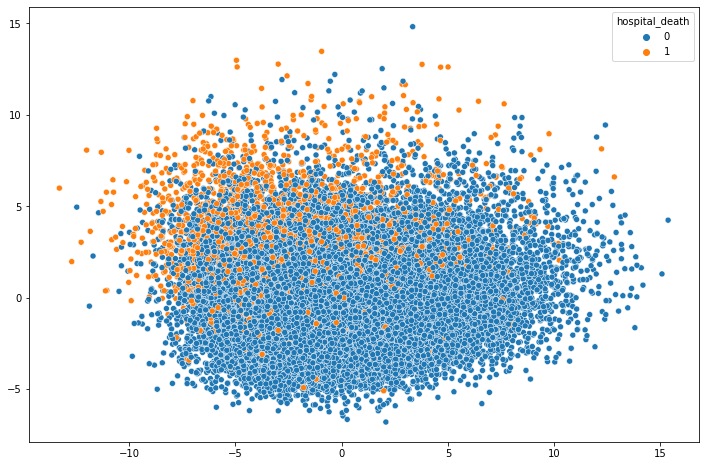

In [103]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = decomposed_X[:,0],  y = decomposed_X[:,1], hue=y_resampled)

In [104]:
X_Scaled.shape, y_resampled.shape

((28728, 92), (28728,))

In [105]:
y_resampled.value_counts()

0    26116
1     2612
Name: hospital_death, dtype: int64

### Splitting training dataset into train and validation

In [106]:
# X_train, X_val, y_train, y_val = train_test_split(X_Scaled, y_resampled, test_size = 0.33, random_state=42)

## Neural Network

In [107]:
#Dependencies
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [144]:
# Neural network
# model = Sequential()
# model.add(Dense(100, input_dim=132, activation='sigmoid'))
# model.add(Dense(60, activation='sigmoid'))
# model.add(Dense(40, activation='sigmoid'))
# model.add(Dense(20, activation='sigmoid'))
# model.add(Dense(10, activation='sigmoid'))
# model.add(Dense(5, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model = Sequential()
# model.add(Dense(16, input_dim=130, activation='sigmoid'))
# model.add(Dense(4, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model = keras.Sequential()
model.add(Dense(1024, input_dim=X_Scaled.shape[1],activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()
# TODO: Compile the model using a loss function and an optimizer.
# opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 1024)              95232     
                                                                 
 dropout_32 (Dropout)        (None, 1024)              0         
                                                                 
 dense_41 (Dense)            (None, 512)               524800    
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 dense_42 (Dense)            (None, 256)               131328    
                                                                 
 dropout_34 (Dropout)        (None, 256)               0         
                                                                 
 dense_43 (Dense)            (None, 128)              

In [140]:
X_Scaled.shape, y_resampled.shape

((52232, 92), (52232,))

In [120]:
X.shape, y.shape

((42879, 92), (42879,))

In [130]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28728, 92), (28728,), (14151, 92), (14151,))

In [132]:
ss_new = StandardScaler()
X_train = ss_new.fit_transform(X_train)
X_train

array([[-0.0394123 ,  0.15188849, -1.63433777, ..., -0.55327663,
         0.66270885,  0.54262073],
       [ 1.35601382, -0.50442239, -1.39751028, ..., -0.55327663,
         0.66270885,  0.54262073],
       [ 0.1425998 ,  0.23906196, -0.45020031, ...,  1.80741414,
        -0.91483292, -0.54829149],
       ...,
       [ 0.74930681, -0.42837207,  0.25841738, ..., -0.55327663,
         1.45147974,  1.63353295],
       [-0.82813142,  0.42064192,  0.50083923, ..., -0.55327663,
         0.66270885,  0.54262073],
       [-0.82813142,  0.09272758, -0.92572008, ..., -0.55327663,
         0.92563248,  1.26989554]])

In [145]:
# patience - how many epochs to wait before stop training
# if there is no further improvement 
# monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 5)
callback = EarlyStopping(monitor='loss', patience=3)
# Complete the model fit operation

#Also we set up big epochs size, just to test that easly stopping is working
model.fit(X_train, y_train, batch_size=500, epochs=100, validation_data=(ss_new.transform(X_test), y_test), callbacks=[callback], verbose=1)

Epoch 1/100


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


58/58 [==============================] - 2s 33ms/step - loss: 0.0000e+00 - accuracy: 0.9069 - val_loss: 0.0000e+00 - val_accuracy: 0.9074
Epoch 2/100
58/58 [==============================] - 2s 32ms/step - loss: 0.0000e+00 - accuracy: 0.9091 - val_loss: 0.0000e+00 - val_accuracy: 0.9074
Epoch 3/100
58/58 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - accuracy: 0.9091 - val_loss: 0.0000e+00 - val_accuracy: 0.9074
Epoch 4/100
58/58 [==============================] - 2s 32ms/step - loss: 0.0000e+00 - accuracy: 0.9091 - val_loss: 0.0000e+00 - val_accuracy: 0.9074


In [117]:
# history = model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=50, batch_size=64)

In [146]:
y_pred = model.predict(ss_new.transform(X_test))
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [147]:
accuracy_score(y_test, y_pred)

0.9074270369585188

In [148]:
confusion_matrix(y_test, y_pred)

array([[12841,     0],
       [ 1310,     0]], dtype=int64)

In [199]:
randomNumber = np.random.randint(0, X.shape[0])
testData = np.array(final_df.iloc[randomNumber]).reshape(1,-1)
print('Predicted: ', int(model.predict(testData)))
print('Actual: ', y.iloc[randomNumber])

Predicted:  0
Actual:  0
